In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
#import compute class weight


## Data description

This exercise is based on subset of data for the ["Give Me Some Credit" Kaggle competition] (https://www.kaggle.com/c/GiveMeSomeCredit), follow this link and take a look at the competition description.

### Getting the data
Dowload the data file called `credit_scoring_sample.csv` from https://github.com/Yorko/mlcourse.ai/tree/master/data


### Data columns
Not all of these columns are present in the sample data we user for this exercise

 - **SeriousDlqin2yrs** (prediction target) - Person experienced 90 days past due delinquency or worse 
 - **RevolvingUtilizationOfUnsecuredLines** - Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
 - **age** - Age of borrower in years
 - **DebtRatio** - Monthly debt payments, alimony, living costs divided by monthly gross income
 - **MonthlyIncome** - Monthly income
 - **NumberOfOpenCreditLinesAndLoans** - Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
 - **NumberRealEstateLoansOrLines** - Number of mortgage and real estate loans including home equity lines of credit
 - **NumberOfDependents** - Number of dependents in family excluding themselves (spouse, children etc.)
 - **NumberOfTimes90DaysLate** - Number of times borrower has been 90 days or more past due.
 - **NumberOfTime60-89DaysPastDueNotWorse**	 - Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
 - **NumberOfTime30-59DaysPastDueNotWorse** - Number of times borrower has been 30-59 days past due but no worse in the last 2 years.


In [2]:
df = pd.read_csv('credit_scoring_sample.csv', sep=';')

In [3]:
df.head().T

,0,1,2,3,4
SeriousDlqin2yrs,0.000000,0.0,0.000000,0.00000,1.00000
age,64.000000,58.0,41.000000,43.00000,49.00000
NumberOfTime30-59DaysPastDueNotWorse,0.000000,0.0,0.000000,0.00000,0.00000
DebtRatio,0.249908,3870.0,0.456127,0.00019,0.27182
NumberOfTimes90DaysLate,0.000000,0.0,0.000000,0.00000,0.00000
NumberOfTime60-89DaysPastDueNotWorse,0.000000,0.0,0.000000,0.00000,0.00000
MonthlyIncome,8158.000000,NaN,6666.000000,10500.00000,400.00000
NumberOfDependents,0.000000,0.0,0.000000,2.00000,0.00000


#### How many columns and samples do we have in this dataset?

In [4]:
#your code here

(45063, 8)

#### How many people in this dataset had serious delinquency?
 - It's the first column `SeriousDlqin2yrs`
 - This is the column we will be trying to predict today

SeriousDlqin2yrs
0    35037
1    10026
Name: count, dtype: int64

#### Plot the bar chart of the SeriousDlqin2yrs column showing the number of people with serious delinquency (`label 1`) and those without (`label 0`)

<Axes: xlabel='SeriousDlqin2yrs'>

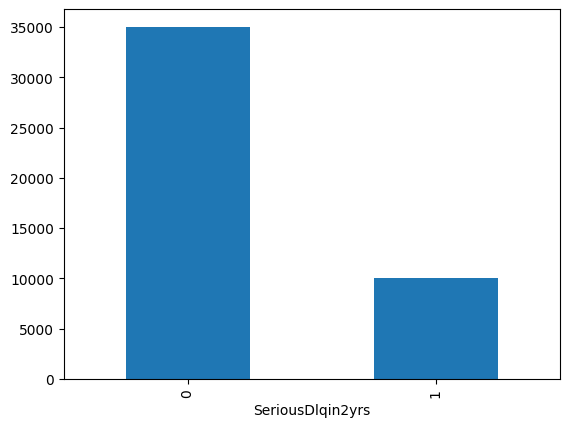

#### The bar chart shows that the data is imbalaced. That is the number of people with serious delinquency is much less than those without.

<img src="./assets/unbalanced.webp" width="600" hight="300" /> 

#### What accuracy score would you expect from the optimistic classifier that expects no delinquency at all?
 - This is our `dummy` classifier that predicts 0 for all samples
 - This is called the Null accuracy
 - Verify that accuracy score using the `accuracy_score()` function


77.75114839225084

#### Calculate the precision, recall and F1 score of the optimistic classifier

#### Are there any columns with missing (NaN) values?
Hint: isnull()

#### Fill in all the missing values using the median value of the corresponding column
Hint: fillna()

#### Define X and y to experiment with some classifiers below

In [12]:
# We will be using all the columns except the target to base our preidctions on
# This is the list of the columns
cols = df.columns[1:].tolist()
cols

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

#### Train a LogesticRegression model using ALL the data and find the accuracy_score
#### Set `max_iter=1000` in the LogisticRegression constructor to avoid a warning message


#### Call this model as `base model`

Hint: There is no need to split the data

#### How many people in the prediction has serious delinquency (`Label 1`)?

np.int64(450)

#### How much better was the LogisticRegression model compared to the Null in terms of accuracy?

#### Evaluate the base model using the confusion_matrix

<img src="./assets/confusion_compatible.png" width="600" hight="300" /> 

array([[34587,   450],
       [ 8552,  1474]])

#### Evaluate the base model using precision, recall and F1 score 

Precision: 76.61122661122661 %
Recall: 14.701775384001595 %
F1 Score: 24.669456066945607 %


#### Running the logistic regression model with different `class_weight`

#### For class 0 (no delinquency) set the weight to 1 and for class 1 (delinquency) set the weight to 2 - we give higher weight to the minority class


#### Call this model as `model_weighted`


In [ ]:
model_weighted = LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 2})
...

Accuracy of weighted model: 82.1583116969576 %


np.int64(5828)

#### Evaluate the weighted model using the confusion_matrix, precision, recall and F1 score

array([[33116,  1921],
       [ 6119,  3907]])

Precision: 67.03843514070007 %
Recall: 38.96868142828646 %
F1 Score: 49.28724612085278 %


#### Compare and Contrast the results of the `weighted model` with the `base model`

#### Repeat the above with different values of `w` in the range between 1 and 10. Plot the accuracy score as a function of `w` label 1's weight


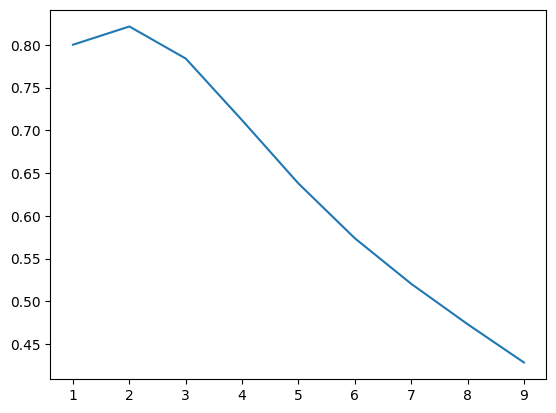

#### Based on the plot of scores, what is the best value for label 1 weight?

#### Scikit Learn also has a function called `compute_class_weight` that automatically computes the weights based on the class distribution. 

In [23]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.array([0, 1])  
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weights

array([0.64307732, 2.247307  ])

#### Make a logestic regression model with the computed class weights and evaluate it using the confusion_matrix, precision, recall and F1 score


#### Call this model as `auto_weighted model`

Precision: 45.624780007039774 %
Recall: 64.64193097945342 %
F1 Score: 53.493458792455954 %


#### Compare and Contrast the results of the `auto_weighted model` with the `weighted model`

#### Which model has higher type 1 error? and which model has higher type 2 error?

<img src="./assets/confusion_error_type.png" width="600" hight="300" /> 

#### If we want to give people very large amount of credit, which model should we use? and why?

#### Useful Resources to read about classification metrics
 - Use [Kavin Markham's notebook](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) as reference